In [2]:
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#import matplotlib.patches as mpatches
#from mpl_toolkits.axes_grid1 import host_subplot
#import mpl_toolkits.axisartist as AA
#from scipy.io import netcdf
import numpy as np
#import pylab
#import os
#import math
#from op_wrfind import *
#from op_wrfext import *
#from op_misc import getPowerLawFit
#import datetime
import xarray as xr


C:\Users\adac\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


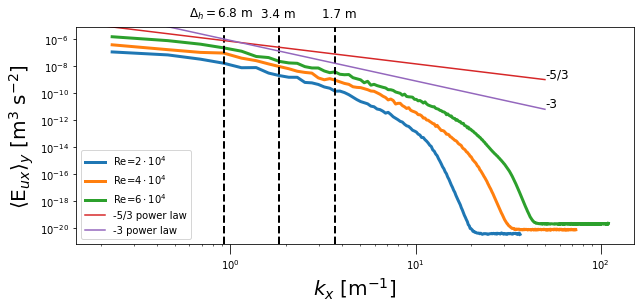

In [19]:
outdir="./"
var="u"

lw=3
fs=20
ls=12

# Plot DNS spectra
fig,ax = plt.subplots(1,1,figsize = (10, 4))
path = "./"
files = ["Re900600000.nc","Re1800623000.nc","Re27001377000.nc"]
labels= [r'Re=$2\cdot10^4$',r'Re=$4\cdot10^4$',r'Re=$6\cdot10^4$']
for ifile in range(len(files)):
    ds = xr.open_dataset(path+files[ifile])
    k=ds['k'].values
    power=ds['power'].values
    ax.loglog(k[1:],power[1:],linewidth=lw,label=labels[ifile])


ymin,ymax=ax.get_ylim()
kLES=k[-1]/np.array([4*15,4*30,4*60])*2
#dxLES=['0.428','0.856','1.71'] #actual grid spaicng
dxLES=['1.7','3.4',r'$\Delta_h=6.8$'] # filter spacing (4*dx)
text_x=np.array([8.5e-1, 8e-1, 6.5e-1])*kLES
for ik in range(kLES.shape[0]):
    ax.loglog((kLES[ik],kLES[ik]),(ymin,ymax),'k--',linewidth=2)
    ax.text(text_x[ik],5e0*ymax,dxLES[ik]+" m",fontsize=12)
ax.tick_params('x', length=10, which='major')    
ax.set_ylim(ymin,ymax)    


freqmin=2e-1
freqmax=5e1 
fitStart = 1e-5
b=-5.0/3.0 #normnal
##b=-2.0/3.0 #compensated
a=fitStart/(freqmin**b)
##plt.loglog([freqmin,freqmax],[a*freqmin**b,a*freqmax**b],label='-2/3 power law')#compensated
ax.loglog([freqmin,freqmax],[a*freqmin**b,a*freqmax**b],label='-5/3 power law') #normal
ax.text(freqmax,1.5*a*freqmax**b,'-5/3',fontsize=12)

freqmin=2e-1
freqmax=5e1 
fitStart = 1e-4
b=-3.0 #normnal
##b=-2.0/3.0 #compensated
a=fitStart/(freqmin**b)
##plt.loglog([freqmin,freqmax],[a*freqmin**b,a*freqmax**b],label='-2/3 power law')#compensated
ax.loglog([freqmin,freqmax],[a*freqmin**b,a*freqmax**b],label='-3 power law') #normal
ax.text(freqmax,1.5*a*freqmax**b,'-3',fontsize=12)

# fig.subplots_adjust(bottom=0.2)
# fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=fs,ncol=3)
# ax.tick_params(labelsize=ls)

plt.legend(loc=3,numpoints=1,fontsize=10)
#plt.title(var+' spectra, z='+str(np.round(hgt,decimals=1))+', time='+str(it))#', dom='+dom+', '+t[5:19])
ax.set_ylabel(r"$\langle$E$_{ux} \rangle_y$ [m$^{3}$ s$^{-2}]$",fontsize=fs)
ax.set_xlabel(r"$k_x$ [m$^{-1}$]",fontsize=fs)
#plt.tight_layout()

plt.savefig(outdir+'Spectra_DNS_'+var+'.eps', format='eps',bbox_inches='tight')#,transparent=True)